In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# 1. Cargar el dataset
data = pd.read_csv('uac_limpio.csv')

# Eliminar la columna 'ESCUELA'
data = data.drop(columns=['ESCUELA'])

# Print the column names to verify
print(data.columns)

Index(['EDAD', 'SEXO', 'EST_CIVIL', 'HIJOS', 'TRABAJA_ESTUDIA', 'VIVE_SOLO',
       'NIVEL_SOCIO_ECON', 'SEMESTRE', 'PPACumulado', 'PPAnterior'],
      dtype='object')


In [ ]:
# Definir las variables independientes (X) para el clustering (sin la columna objetivo)
X = data.drop('PPACumulado', axis=1)

# Escalar los datos para normalizarlos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

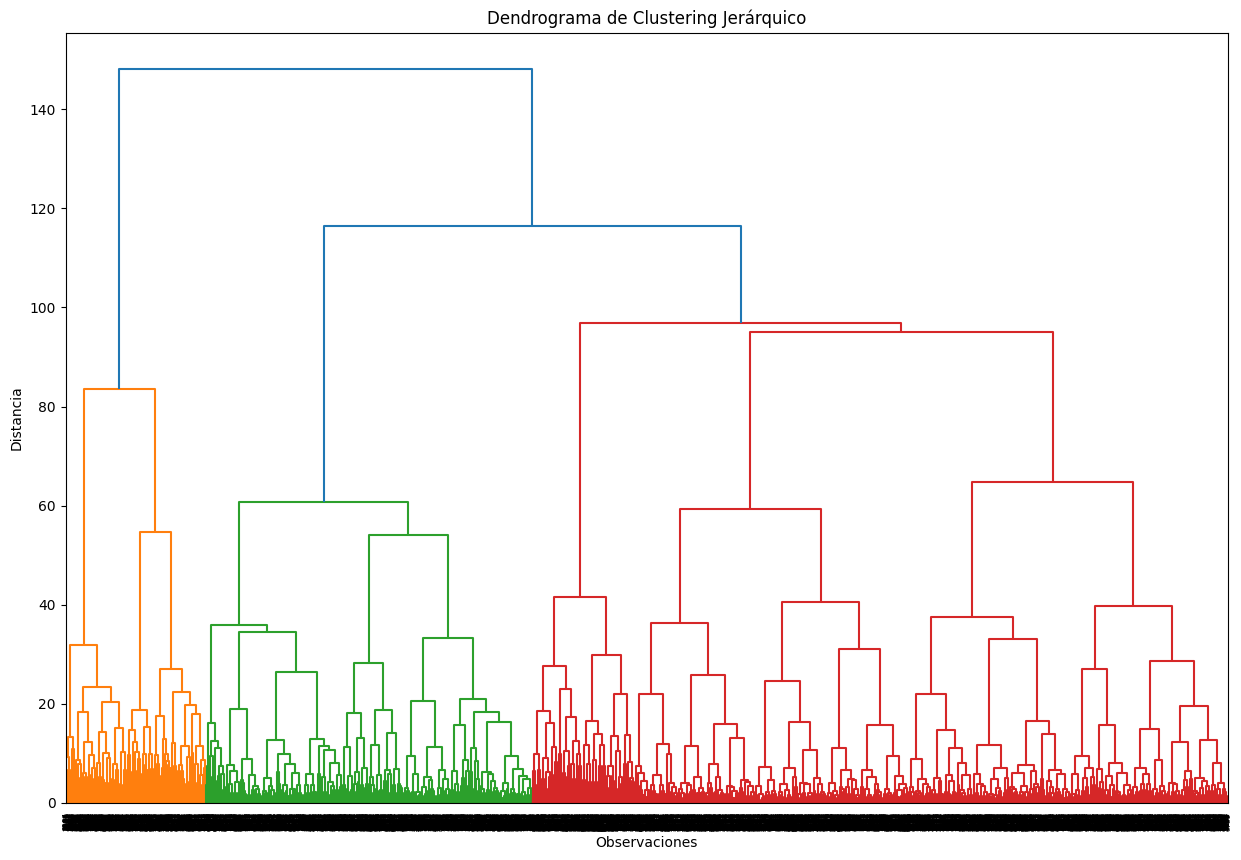

In [ ]:
# 2. Aplicar el Algoritmo de Agrupamiento Jerárquico
# Crear el linkage con el método 'ward' (minimización de la varianza)
Z = linkage(X_scaled, method='ward')

# Visualizar el dendrograma para entender cómo se forman los clusters
plt.figure(figsize=(15, 10))
plt.title("Dendrograma de Clustering Jerárquico")
dendrogram(Z)
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

In [ ]:
# 3. Elegir el número de clusters
 #(puedes ajustar el valor de 't' o el criterio)
# Usamos 't=5' para cortar el dendrograma
#a una altura específica y obtener 5 clusters
clusters = fcluster(Z, t=5, criterion='maxclust')

# Añadir los clusters al dataset original
data['Cluster'] = clusters

Índice de Silueta Promedio: 0.1753447053444801


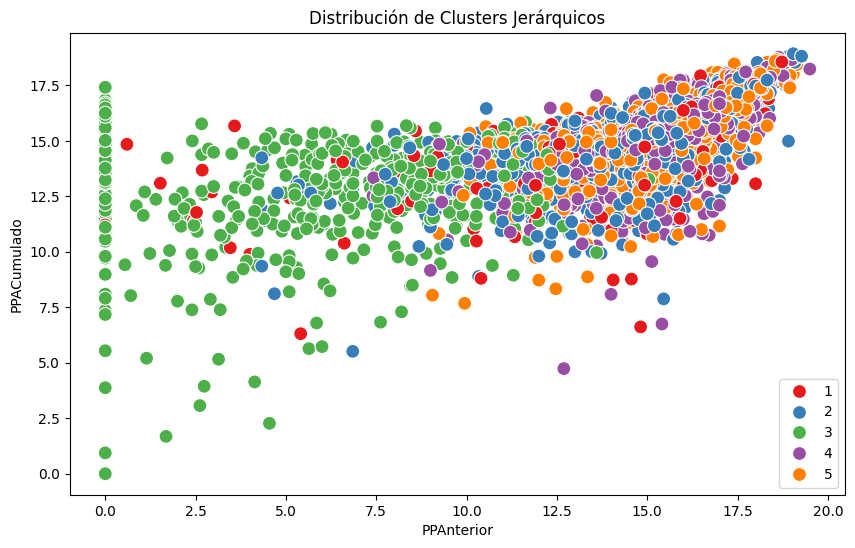

In [ ]:
# 4. Métricas de Evaluación del Modelo
# Usar el índice de silueta para evaluar la coherencia de los clusters
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Índice de Silueta Promedio: {silhouette_avg}")

# Visualizar la distribución de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PPAnterior', y='PPACumulado', hue='Cluster', palette='Set1', s=100)
plt.title('Distribución de Clusters Jerárquicos')
plt.xlabel('PPAnterior')
plt.ylabel('PPACumulado')
plt.legend()
plt.show()

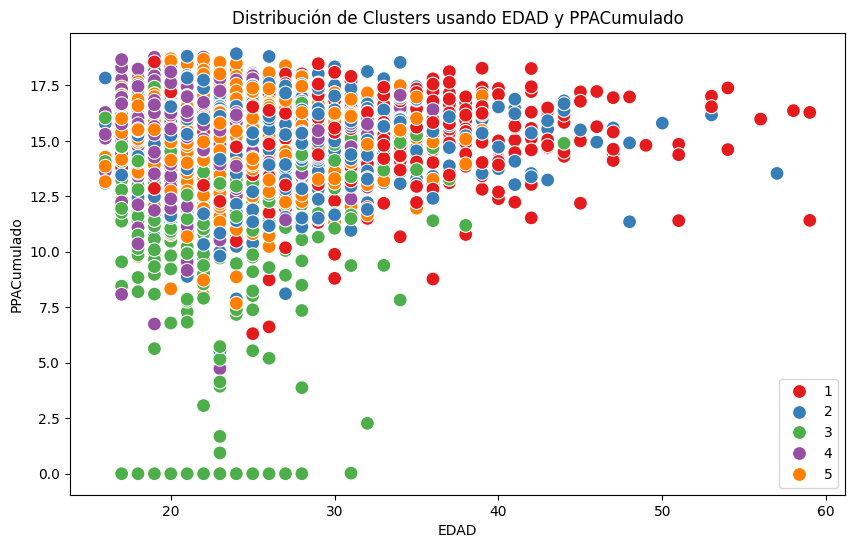

In [ ]:
# Visualizar los clusters respecto a variable edad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='EDAD', y='PPACumulado', hue='Cluster', palette='Set1', s=100)
plt.title('Distribución de Clusters usando EDAD y PPACumulado')
plt.xlabel('EDAD')
plt.ylabel('PPACumulado')
plt.legend()
plt.show()

In [ ]:
# Definir las características del nuevo alumno (EDAD, SEXO, EST_CIVIL, HIJOS, TRABAJA_ESTUDIA, VIVE_SOLO, NIVEL_SOCIO_ECON, SEMESTRE, PPAnterior)
nuevo_alumno = np.array([[22, 0, 0, 0, 0, 1, 2, 10, 15]])  # Ejemplo de nuevo alumno

# Escalar los datos del nuevo alumno utilizando el mismo escalador
nuevo_alumno_scaled = scaler.transform(nuevo_alumno)

# Generar la distancia de enlace jerárquico para los datos existentes
Z = linkage(X_scaled, method='ward')

# Asignar el nuevo alumno a un cluster usando el mismo criterio que antes
nuevo_alumno_cluster = fcluster(Z, t=5, criterion='maxclust')[-1]

# Mostrar a qué cluster pertenece el nuevo alumno
print(f"El nuevo alumno pertenece al cluster {nuevo_alumno_cluster}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


El nuevo alumno pertenece al cluster 4


In [ ]:
from sklearn.decomposition import PCA

Varianza explicada por el primer componente: 23.59%
Varianza explicada por el segundo componente: 14.13%


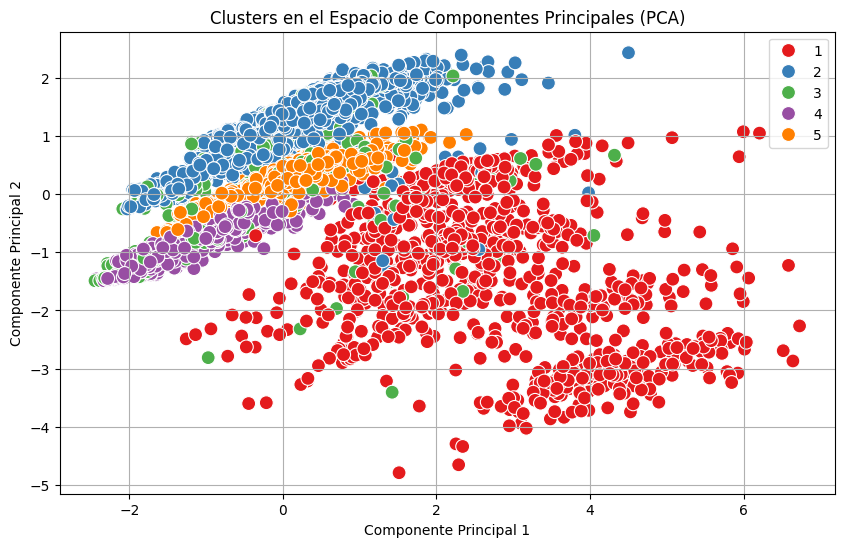

In [ ]:
# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por el primer componente: {explained_variance[0] * 100:.2f}%")
print(f"Varianza explicada por el segundo componente: {explained_variance[1] * 100:.2f}%")

# Visualizar los clusters en el espacio de componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Clusters en el Espacio de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()